In [1]:
import sys
sys.path.append('../')
from virac_utils import wrap
from gas_maps import *
from young_stars import *
from agama_models import nuclear_bulge_model

## The potential

In [2]:
from agama_models import *
rmax=10.
from scipy.integrate import quad
nsd_pot = bulge_potential(compt='NSD')
nsc_pot = bulge_potential(compt='NSC')
blg_pot = bulge_potential(compt='Bulge')
central_pot = bulge_potential(compt='all')
full_pot = bulge_potential(compt='full')
def calc_mass(rmax,pot=central_pot):
    return quad(lambda theta:
          quad(lambda r: 2.*np.pi*r**2*np.sin(theta)*pot.density(
              np.array([r*np.sin(theta),0.,r*np.cos(theta)])),0.,rmax,epsabs=1e-3,epsrel=1e-3)[0],
                0.,np.pi,epsabs=1e-3,epsrel=1e-3)[0]

print('Vc at Sun',np.sqrt(-full_pot.force(np.array([8180.,0.,0.]))[0]*8180.))

181.27094330968228
5.852054075351948
181.27094330968228
5.852054075351948
181.27094330968228
5.852054075351948
181.27094330968228
5.852054075351948
181.27094330968228
5.852054075351948
Vc at Sun 233.7574396379249


In [3]:
xmax=3000.
radii = np.exp(np.linspace(np.log(0.08),np.log(xmax)))
mm=np.array([calc_mass(rr,full_pot) for rr in radii])
mm_nsd=np.array([calc_mass(rr,nsd_pot) for rr in radii])
mm_nsc=np.array([calc_mass(rr,nsc_pot) for rr in radii])
mm_blg=np.array([calc_mass(rr,blg_pot) for rr in radii])
disk_nfw = agama.Potential(disk_pot_1, disk_pot_2, nfw, gas_disc_1, gas_disc_2)
mm_both=np.array([calc_mass(rr,disk_nfw) for rr in radii])

In [4]:
lindqvist = {'r':np.array([5.,18.,31.,39.,52.,67.,104.]),
             'm':np.array([1.1,2.1,7.4,9.2,17.,36.,67.])*1e7,
             'em':np.array([0.4,0.9,3.1,3.5,6.,14.,18.])*1e7}
genzel97 = {'r':np.array([1.5,1.9,3.8,4.,11.3]),
          'm':np.array([4.5,5.7,11.2,11,30.])*1e6,
          'em':np.array([0.95,0.97,1.9,2.8,4.8])*1e6}
genzel = {'r':np.array([0.6,0.8,1.,2,4,12]),
          'm':np.array([3.5,3.85,4.2,6.4,11.9,32.])*1e6,
          'em':np.array([0.6,0.4,0.4,1.1,2,5])*1e6}
mcginn = {'r':np.array([9.,17.,19.,23.,34.,36.,45.,54.,68.,72.,85.,90.])/3600/180*np.pi*8170,
          'm':np.array([2.5,4.9,4.3,6.8,6.0,5.7,8.2,9.0,9.1,16.5,15.3,9.4])*1e6,
          'em':np.array([0.9,1.7,1,1.3,1,1.7,1.3,1.6,1.9,2.8,2.9,4.7])*1e6}

In [5]:
class launhardt_data(object):
    def __init__(self):
        xx = np.array([0.6,1.,3.,6., 10.,30.,60.,100.,150.,300.,500.])
        yy = np.array([3.3, 4.2,9.5,16.,21.,57.,200.,650.,1250.,2400.,3700.])*1e6
        from scipy.interpolate import UnivariateSpline
        self.u = UnivariateSpline(xx,yy)
    def __call__(self, xxx):
        return self.u(xxx)
launhardt = launhardt_data()
burton_liszt = {'r':300.,'m':2.2e9,'em':0.5e9}

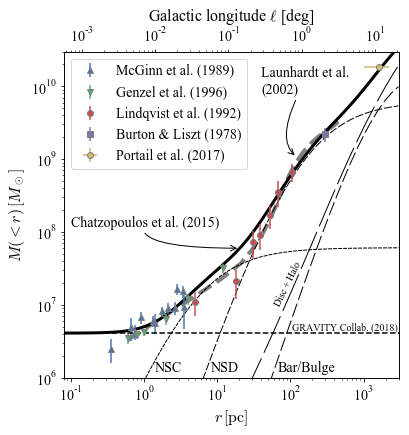

In [6]:
plt.figure(figsize=[6.,6.])

plt.plot(radii, (mm+4.1e6/1e6)*1e6,color='k',lw=3,zorder=-20)
l,=plt.plot(radii, mm_nsc*1e6,color='k',lw=1,zorder=-20,ls='dashed')
l.set_dashes((4,1))
l,=plt.plot(radii, mm_nsd*1e6,color='k',lw=1,zorder=-20,ls='dashed')
l.set_dashes((8,2))
l,=plt.plot(radii, (mm_blg)*1e6,color='k',lw=1,zorder=-20,ls='dashed')
l.set_dashes((14,4))

l,=plt.plot(radii, (.88*mm_both)*1e6,color='k',lw=1,zorder=-20,ls='dashed')
l.set_dashes((40,6))

plt.errorbar(mcginn['r'],
             mcginn['m'],
             yerr=mcginn['em'],fmt='^',mec='gray',label='McGinn et al. (1989)')
plt.errorbar(genzel['r'],
             genzel['m'],
             yerr=genzel['em'],fmt='v',mec='gray',label='Genzel et al. (1996)')

plt.errorbar(lindqvist['r'],
             lindqvist['m'],
             yerr=lindqvist['em'],fmt='o',mec='gray',label='Lindqvist et al. (1992)')

plt.errorbar(burton_liszt['r'],
             burton_liszt['m'],
             burton_liszt['em'],fmt='s',mec='gray',label='Burton & Liszt (1978)')

plt.errorbar([1600.],[1.85e10],yerr=[0.07e10],xerr=[600.],fmt='o',mec='gray',label='Portail et al. (2017)')

xxx = np.linspace(0.6,500.)
plt.plot(xxx,launhardt(xxx),color='gray',lw=4,ls='dashed',zorder=-30)

plt.semilogy()
plt.semilogx()

# plt.plot(4.100 ± 0.034)
# plt.errorbar([0.1],[4.1e6],yerr=[0.034e6],fmt='o',color='k',ms=10,label='GRAVITY Collab. (2018)')

plt.axhline(4.1e6,color='k',ls='dashed')
plt.annotate('GRAVITY Collab. (2018)', xy=(2900.,4.1e6),xycoords='data',ha='right',va='bottom',fontsize=10)
plt.xlim(0.08,xmax)
plt.xlim(0.08,3000.)
plt.legend()
plt.xlabel(r'$r\,[\mathrm{pc}]$')
plt.ylabel(r'$M(<r)\,[M_\odot]$')
plt.ylim(1e6,)
plt.annotate('NSC',xy=(1.4,1.2e6),fontsize=14)
plt.annotate('NSD',xy=(8.,1.2e6),fontsize=14)
plt.annotate('Bar/Bulge',xy=(68.,1.2e6),fontsize=14)
plt.annotate('Disc + Halo',xy=(58.,3.2e7),fontsize=10,rotation=64.)
plt.annotate('Launhardt et al.\n(2002)',xy=(120.,launhardt(120.)*1.2),xytext=(40.,8e9),fontsize=14,rotation=0,
            arrowprops=dict(facecolor='black',arrowstyle="->",connectionstyle="angle3,angleA=60,angleB=-40"))
plt.annotate('Chatzopoulos et al. (2015)',xy=(20.,60.*1e6),xytext=(.1,1.2e8),fontsize=14,rotation=0,
            arrowprops=dict(facecolor='black',arrowstyle="->",connectionstyle="angle3,angleA=60,angleB=0"))
xlim = plt.gca().get_xlim()
plt.twiny()
plt.xlim(np.rad2deg(xlim[0]/8170),np.rad2deg(xlim[1]/8170))
plt.semilogx()
plt.xlabel(r'Galactic longitude $\ell$ [deg]')
plt.ylim(1e6,3e10)
plt.savefig('potential.pdf',bbox_inches='tight')


In [7]:
calc_mass(500.,nsd_pot)/nsd_pot.totalMass()

0.4787116302912858

In [8]:
def hist_(ll, color='k',label='', fill=True, **kwargs):
    if fill:
        plt.hist(ll,color=color, alpha=0.4, label=label,**kwargs);
    return plt.hist(ll,color=color, histtype='step', lw=2, **kwargs);


In [9]:
data = pd.read_csv('/data/jls/mira/cnd_sample.csv')

In [10]:
from agama_models import *
nb = nuclear_bulge_model(Jr0_Jphi0=0.2)

181.27094330968228
5.852054075351948
2.8678520742169615
1.7516443523089869
3.1415673132136566


In [11]:
samples=nb.generate_samples(10000000)

In [12]:
Ie_nsd=19.84

def sersic_nsd(l,b):
    x = np.deg2rad(l)*R0
    y = np.deg2rad(b)*R0
    Re_nsd=116.2/1000. #kpc
    n_nsd = 0.782
    q_nsd = 0.338
    
    Re_nsd=86.9/1000. #kpc
    n_nsd = 1.09
    q_nsd = 0.372
    
    bn = 1.9992*n_nsd-0.32
    return Ie_nsd*np.exp(-bn*(np.power(np.sqrt(x*x+y*y/q_nsd/q_nsd)/Re_nsd,1./n_nsd)-1.))

Ie_nsc = Ie_nsd / 0.279 * 2.64

def sersic_nsc(l,b):
    x = np.deg2rad(l)*R0
    y = np.deg2rad(b)*R0
    Re_nsc=4.9/1000. #kpc
    n_nsc = 1.8
    q_nsc = 0.66
    bn = 1.9992*n_nsc-0.32
    return Ie_nsc*np.exp(-bn*(np.power(np.sqrt(x*x+y*y/q_nsc/q_nsc)/Re_nsc,1./n_nsc)-1.))


ax,ay,az=1.1,0.36,0.22
cperp,cpar=1.6,3.2
bar_angle=28.
cba = np.cos(np.deg2rad(bar_angle))
sba = np.sin(np.deg2rad(bar_angle))
Ie_bulge = 9.9*2.

def ellipsoid(x,y,z):
    x,y = x*cba+y*sba, -x*sba+y*cba
    radius = np.power(np.abs(x)/ax,cperp)
    radius += np.power(np.abs(y)/ay,cperp)
    radius = np.power(radius, cpar/cperp)
    radius += np.power(np.abs(z)/az,cpar)
    radius = np.power(radius, 1./cpar)
    return Ie_bulge*np.exp(-radius)
from scipy.integrate import quad
def surface_density_bulge(l,b):
    return quad(lambda s: ellipsoid(R0-s*np.cos(np.deg2rad(l))*np.cos(np.deg2rad(b)),
                                    s*np.sin(np.deg2rad(l))*np.cos(np.deg2rad(b)),
                                    s*np.sin(np.deg2rad(b))),0.,np.inf)[0]

(0.01, 5.267035128158741e+17)

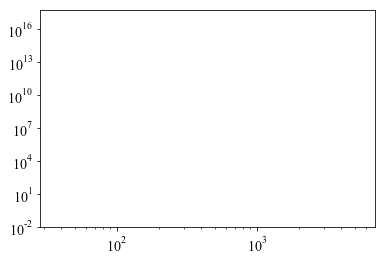

In [13]:
xx = np.linspace(0.,1.5,150)
bb=0.0
norm = sersic_nsd(0.,0.)
nsc = np.array([sersic_nsc(xxx,bb)/norm for xxx in xx])
nsd = np.array([sersic_nsd(xxx,bb)/norm for xxx in xx])
blg = np.array([surface_density_bulge(xxx,bb)/norm for xxx in xx])
plt.plot(xx*3600., nsc)
plt.plot(xx*3600., nsd)
plt.plot(xx*3600., blg)
plt.plot(xx*3600., blg+nsc+nsd, color='k')

nsc = np.array([sersic_nsc(bb,xxx)/norm for xxx in xx])
nsd = np.array([sersic_nsd(bb,xxx)/norm for xxx in xx])
blg = np.array([surface_density_bulge(bb,xxx)/norm for xxx in xx])
plt.plot(xx*3600., nsc)
plt.plot(xx*3600., nsd)
plt.plot(xx*3600., blg)
plt.plot(xx*3600., blg+nsc+nsd, color='k')
plt.semilogy()
plt.semilogx()
plt.ylim(1e-2,)

/data/jls/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(0.1511534808150731, 20.299999430114685)

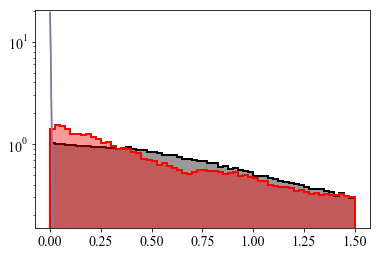

In [14]:
xx = np.linspace(0.,1.5,30)
bb=0.07
blg = np.array([surface_density_bulge(xxx,bb) for xxx in xx])
nsc = np.array([sersic_nsc(xxx,bb) for xxx in xx])
nsd = np.array([sersic_nsd(xxx,bb) for xxx in xx])
summ = np.sum((blg+nsc+nsd)*np.diff(xx)[0])
plt.plot(xx, blg/summ)
plt.plot(xx, nsc/summ);
plt.plot(xx, nsd/summ);
plt.plot(xx, (blg+nsc+nsd)/summ);
plt.ylim(0.,)
hist_(np.abs(samples['l'])[np.abs(samples['b'])<0.2],bins=60,normed=True);
dfltr = (data['duplicate']==0)&(data['epml']<10000.)
n,b,p=hist_(np.abs(wrap(np.abs(data['l'])))[(np.abs(data['b'])<0.2)&(dfltr)],bins=60,normed=True,color='r');
plt.semilogy()
plt.ylim(np.min(n)*0.5,)

(0.12631505185652878, 34.3)

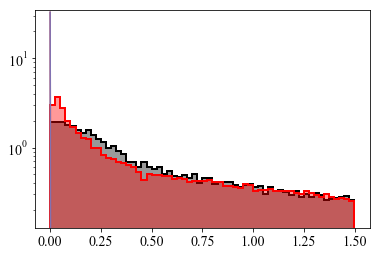

In [15]:
xx = np.linspace(0.,1.5,50)
ll=0.05
blg = np.array([surface_density_bulge(ll,xxx) for xxx in xx])
nsc = np.array([sersic_nsc(ll,xxx) for xxx in xx])
nsd = np.array([sersic_nsd(ll,xxx) for xxx in xx])
summ = np.sum((blg+nsc+nsd)*np.diff(xx)[0])

plt.plot(xx, blg/summ)
plt.plot(xx, nsc/summ);
plt.plot(xx, nsd/summ);
plt.plot(xx, (blg+nsc+nsd)/summ);
plt.ylim(0.,)
hist_(np.abs(samples['b'])[np.abs(samples['l'])<0.05],bins=60,normed=True);
dfltr = (data['duplicate']==0)&(data['epml']<10000.)
n,b,p=hist_(np.abs(wrap(np.abs(data['b'])))[(np.abs(wrap(data['l']))<0.05)&dfltr],bins=60,normed=True,color='r');
plt.semilogy()
plt.ylim(np.min(n)*.5,)

In [16]:
NL, NB = 30,30
LL = np.linspace(-1.5,1.5,NL)
BB = np.linspace(-1.5,1.5,NB)
LL, BB = np.meshgrid(LL, BB)
LL, BB = LL.flatten(), BB.flatten()
sd = np.reshape(np.array([sersic_nsc(l, b)+sersic_nsd(l, b)+surface_density_bulge(l, b) for l, b in zip(LL, BB)]), (NL, NB))

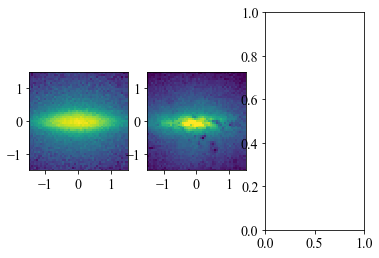

In [20]:
f,a=plt.subplots(1,3)
plt.sca(a[0])
plt.hist2d(samples['l'],samples['b'],bins=50,norm=LogNorm());
plt.gca().set_aspect('equal')
plt.sca(a[1])
dfltr = (data['duplicate']==0)&(data['epml']<10000.)&(data['ks_n_observations']/data['ks_n_observations']>0.2)
plt.hist2d(wrap(data['l'])[dfltr],data['b'][dfltr],bins=50,norm=LogNorm(),vmax=2000,vmin=200);
plt.gca().set_aspect('equal')
# plt.sca(a[2])
# plt.imshow(sd, norm=LogNorm(),vmin=15.)

In [21]:
dong = load_dong()
yso = load_yso()

/data/jls/python3.5/site-packages/astropy_healpix/core.py:435: RuntimeWarning: invalid value encountered in lonlat_to_healpix_nested
  healpix_index, dx, dy = func(lon, lat, nside)


1815


/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name ra is repeated in the output, new name ra_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name dec is repeated in the output, new name dec_1 assigned
  'new name %s assigned') % (_n, curn))


In [22]:
len(dong), np.count_nonzero(dong['epml']>0.), \
np.count_nonzero(~(dong['counterpart']=='none')), np.count_nonzero(~(dong['counterpart']=='none')&(dong['epml']>0.)), \
np.count_nonzero((dong['location']=='F')), np.count_nonzero((dong['location']=='F')&(dong['epml']>0.))

(176, 93, 117, 38, 96, 80)

In [23]:
len(yso), np.count_nonzero(yso['epml']>0.)

(1815, 1761)

In [24]:
jones = gas_map('Jones')
astro = gas_map('AST_RO')
cogal = gas_map('COGAL')

../virac_utils.py:30: RuntimeWarning: invalid value encountered in greater
  return l-360.*(l>180)


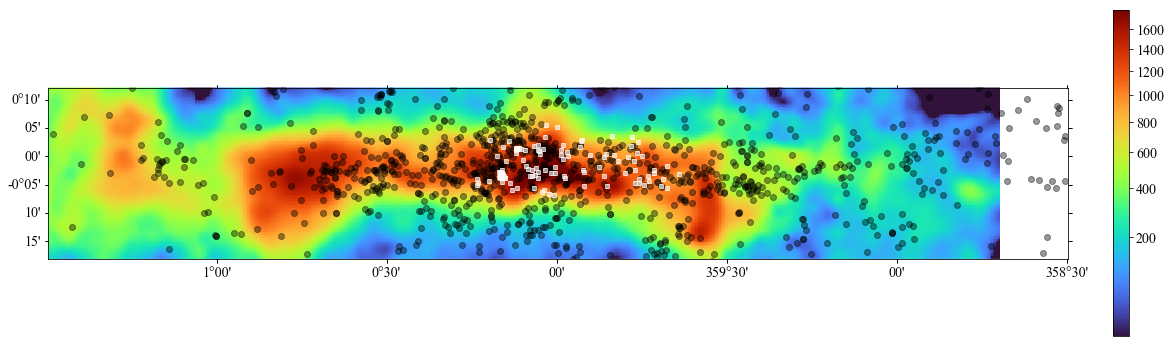

In [25]:
ax=astro.plot_density(smoothing=0.0005)
ax.set_autoscale_on(False)
plot_scatter(np.array([wrap(yso['l'].values),yso['b'].values]).T,astro,color='k',alpha=0.4)
plot_scatter(np.array([wrap(dong['l'].values),dong['b'].values]).T,astro,color='w',alpha=0.6,s=20,marker='s')

set_xlim(np.array([1.5,-1.5]), astro)
# plot_scatter(np.ar)
# set_ylim(np.array([-0.4,0.4]), astro)

../virac_utils.py:30: RuntimeWarning: invalid value encountered in greater
  return l-360.*(l>180)


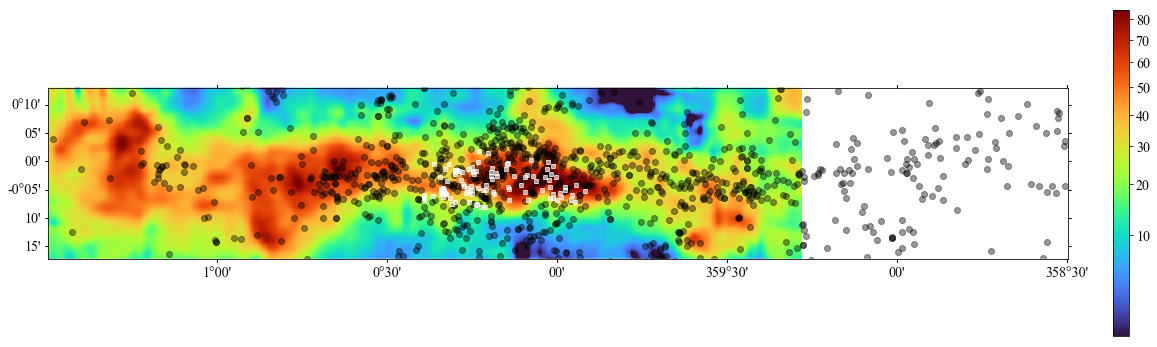

In [26]:
ax=jones.plot_density(smoothing=3)
ax.set_autoscale_on(False)
plot_scatter(np.array([wrap(yso['l'].values),yso['b'].values]).T,jones,color='k',alpha=0.4)
plot_scatter(np.array([wrap(dong['l'].values),dong['b'].values]).T,astro,color='w',alpha=0.6,s=20,marker='s')
set_xlim(np.array([1.5,-1.5]), jones)
# set_ylim(np.array([-0.4,0.4]), jones)

In [32]:
from compute_completeness import completeness as completeness_
completeness = completeness_('DoPhot')

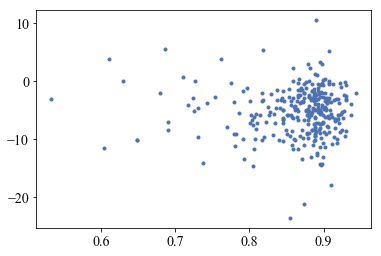

In [46]:
fltr = (yso['duplicate']==0)&(np.abs(yso['b'])<0.2)&(np.abs(yso['pmb'])<5.)&(np.abs(wrap(yso['l']))<.3)&(np.abs(wrap(yso['l']))>0.0)&(yso['epml']<3.)

plt.plot(completeness.query(yso['l'][fltr],yso['b'][fltr],yso['ks_ivw_mean_mag'][fltr]),yso['pml'][fltr],'.')

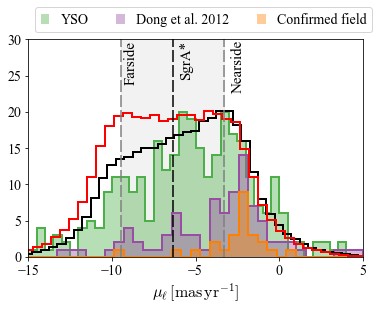

In [62]:
fltr = (yso['duplicate']==0)&(np.abs(yso['b'])<0.2)&(np.abs(yso['pmb'])<5.)&(np.abs(wrap(yso['l']))<.3)&(np.abs(wrap(yso['l']))>0.0)&(yso['epml']<3.)
colors = ['#4daf4a','#984ea3','#ff7f00']
hist_(yso['pml'][fltr],color=colors[0],range=[-15,5],bins=40,label='YSO');
hist_(dong['pml'],color=colors[1],bins=35,range=[-15,5],label='Dong et al. 2012');
hist_(dong['pml'][(dong['location']=='F')&(dong['counterpart']!='none')],bins=35,range=[-15,5],color=colors[2],label='Confirmed field');

maxy = 30.
plt.annotate('SgrA*',xy=(-6.,maxy-0.2),xycoords='data',rotation=90,fontsize=15,va='top')
plt.annotate('Nearside',xy=(-2.9,maxy-0.2),xycoords='data',rotation=90,fontsize=15,va='top')
plt.annotate('Farside',xy=(-9.3,maxy-0.2),xycoords='data',rotation=90,fontsize=15,va='top')
l=plt.axvline(-6.379,color='k');l.set_dashes((8,2))
l=plt.axvline(-6.379+120./(4.74*8.17),color='gray');l.set_dashes((8,2))
l=plt.axvline(-6.379-120./(4.74*8.17),color='gray');l.set_dashes((8,2))
plt.axvspan(-6.379+120./(4.74*8.17),-6.379-120./(4.74*8.17),alpha=0.1,color='gray',zorder=-20)
plt.ylim(0.,maxy)
plt.xlim(-15,5)
plt.legend(ncol=3,bbox_to_anchor=(0.,1.),loc='lower left',handlelength=0.6)
plt.xlabel(r'$\mu_\ell\,[\mathrm{mas\,yr}^{-1}]$')

fltrr = (np.abs(samples['b'])<0.2)&(wrap(samples['l'])<0.3)&(np.abs(samples['pmb'])<5.)
hist_(samples['pml'][fltrr]+np.random.normal(0.,yso['epml'][fltr].sample(np.count_nonzero(fltrr),replace=True),np.count_nonzero(fltrr)),
        bins=60,
      weights=7.5e-4*np.ones(np.count_nonzero(fltrr))*(18.2-(11.5-.3*samples['pml'][fltrr])),
      fill=False);
hist_(samples['pml'][fltrr]+np.random.normal(0.,yso['epml'][fltr].sample(np.count_nonzero(fltrr),replace=True),np.count_nonzero(fltrr)),
        bins=60,weights=3.9e-3*np.ones(np.count_nonzero(fltrr)),
      fill=False,color='r');

In [51]:
complete = completeness.query(yso['l'].values,yso['b'].values,yso['ks_ivw_mean_mag'].values)

/data/jls/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


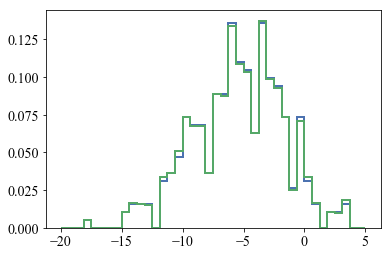

In [52]:
fltr = (yso['duplicate']==0)&(np.abs(yso['b'])<0.2)&(np.abs(yso['pmb'])<5.)&(np.abs(wrap(yso['l']))<.3)&(np.abs(wrap(yso['l']))>0.0)&(yso['epml']<3.)

plt.hist(yso['pml'][fltr],range=[-20,5],bins=40,histtype='step',lw=2,normed=True);
plt.hist(yso['pml'][fltr],weights=1./complete[fltr],range=[-20,5],bins=40,histtype='step',lw=2,normed=True);

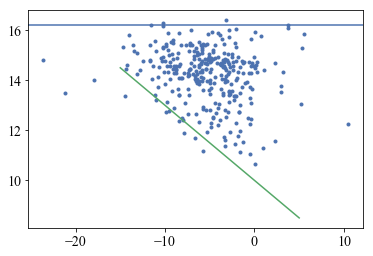

In [53]:
plt.plot(yso['pml'][fltr],yso['ks_ivw_mean_mag'][fltr],'.')
xx = np.linspace(-15.,5.)
plt.plot(xx,10.-.3*xx)
plt.axhline(16.2)

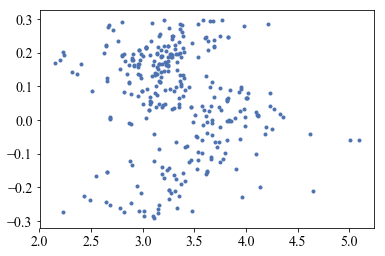

In [54]:
plt.plot(yso['akh45'][fltr],wrap(yso['l'][fltr]),'.')

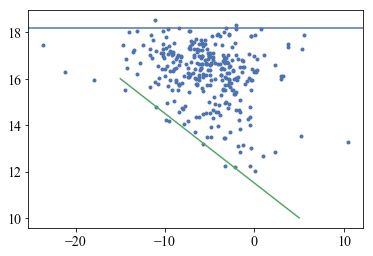

In [55]:
plt.plot(yso['pml'][fltr],yso['h_ivw_mean_mag'][fltr],'.')
xx = np.linspace(-15.,5.)
plt.plot(xx,11.5-.3*xx)
plt.axhline(18.2)

In [64]:
import seaborn as sns

0.8928258757782678


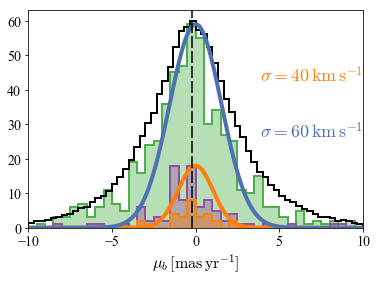

In [65]:
fltr = (yso['duplicate']==0)&(np.abs(yso['b'])<0.2)&(np.abs(wrap(yso['l']))<.6)&(np.abs(wrap(yso['l']))>0.05)#&(yso['epmb']<.5)
print(np.nanmedian(yso['epmb']))
colors = ['#4daf4a','#984ea3','#ff7f00']
n,b,p=hist_(yso['pmb'][fltr],color=colors[0],range=[-10,10],bins=40);
nb,b,p=hist_(dong['pmb'],color=colors[1],bins=40,range=[-10,10]);
hist_(dong['pmb'][(dong['location']=='F')&(dong['counterpart']!='none')],bins=40,range=[-10,10],color=colors[2]);

xx = np.linspace(-15,15,1000)
sigma = 40.
sigmamu = sigma/(8.17*4.74)
plt.plot(xx,np.exp(-xx**2/2./sigmamu**2)*np.max(nb),lw=4,color="#ff7f0e",zorder=1)
plt.annotate(r'$\sigma=%i\,\mathrm{km\,s}^{-1}$'%sigma,xy=(1.,0.7),xycoords='axes fraction', 
             ha='right',va='center',color="#ff7f0e",fontsize=18)
# plt.ylabel('Normalized number per bin')
sigma = 60.
sigmamu = sigma/(8.17*4.74)
plt.plot(xx,np.exp(-(xx)**2/2./sigmamu**2)*np.max(n),lw=4,zorder=1,color=sns.color_palette()[0])
plt.annotate(r'$\sigma=%i\,\mathrm{km\,s}^{-1}$'%sigma,xy=(1.,0.44),xycoords='axes fraction', 
             ha='right',va='center',color=sns.color_palette()[0],fontsize=18)
l=plt.axvline(-7.25/8.17/4.74,color='k');l.set_dashes((8,2))
plt.xlim(-10,10)
plt.xlabel(r'$\mu_b\,[\mathrm{mas\,yr}^{-1}]$')
fltrr = (np.abs(samples['b'])<0.2)&(wrap(samples['l'])<0.6)#&(np.abs(samples['pmb'])<5.)
hist_(samples['pmb'][fltrr]+np.random.normal(0.,yso['epmb'][fltr].sample(np.count_nonzero(fltrr),replace=True),np.count_nonzero(fltrr)),
        bins=60,weights=16e-4*np.ones(np.count_nonzero(fltrr))*(18.2-(10.-.4*samples['pml'][fltrr])),range=[-10,10],
      fill=False);

In [66]:
import agama
from agama_models import bulge_potential, generate_samples
potl = bulge_potential()
Rsc=80.
Vc = np.sqrt(Rsc*-potl.force(np.array([Rsc,0.,0.]))[0])
Rwidth=20.
JR0=Vc*Rsc*0.01
Jz0=Vc*Rsc*0.3
weight=0.
def fn(J):
    return (1-weight)*np.exp(-(J[:,2]-Rsc*Vc)**2/2./(Rwidth*Vc)**2)/np.sqrt(2.*np.pi)/(Rwidth*Vc)*np.exp(-J[:,1]/Jz0)*np.exp(-J[:,0]/JR0)/(JR0*Jz0)+\
        weight*np.exp(-(J[:,2]-0.1*Rsc*Vc)**2/2./(Rwidth*Vc)**2)/np.sqrt(2.*np.pi)/(Rwidth*Vc)*np.exp(-J[:,1]/Jz0)*np.exp(-J[:,0]/JR0)/(JR0*Jz0)
customdf = agama.DistributionFunction(fn)

181.27094330968228
5.852054075351948


In [67]:
ss = generate_samples(potl,customdf,2000,None)

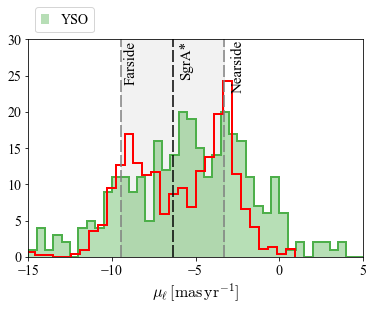

In [68]:
fltr = (yso['duplicate']==0)&(np.abs(yso['b'])<0.2)&(np.abs(yso['pmb'])<5.)&(np.abs(wrap(yso['l']))<.3)&(np.abs(wrap(yso['l']))>0.0)&(yso['epml']<3.)
colors = ['#4daf4a','#984ea3','#ff7f00']
hist_(yso['pml'][fltr],color=colors[0],range=[-15,5],bins=40,label='YSO');

maxy = 30.
plt.annotate('SgrA*',xy=(-6.,maxy-0.2),xycoords='data',rotation=90,fontsize=15,va='top')
plt.annotate('Nearside',xy=(-2.9,maxy-0.2),xycoords='data',rotation=90,fontsize=15,va='top')
plt.annotate('Farside',xy=(-9.3,maxy-0.2),xycoords='data',rotation=90,fontsize=15,va='top')
l=plt.axvline(-6.379,color='k');l.set_dashes((8,2))
l=plt.axvline(-6.379+120./(4.74*8.17),color='gray');l.set_dashes((8,2))
l=plt.axvline(-6.379-120./(4.74*8.17),color='gray');l.set_dashes((8,2))
plt.axvspan(-6.379+120./(4.74*8.17),-6.379-120./(4.74*8.17),alpha=0.1,color='gray',zorder=-20)
plt.ylim(0.,maxy)
plt.xlim(-15,5)
plt.legend(ncol=3,bbox_to_anchor=(0.,1.),loc='lower left',handlelength=0.6)
plt.xlabel(r'$\mu_\ell\,[\mathrm{mas\,yr}^{-1}]$')

fltrr = (np.abs(ss['b'])<0.2)&(wrap(ss['l'])<0.3)&(np.abs(ss['pmb'])<5.)
hist_(ss['pml'][fltrr]+np.random.normal(0.,yso['epml'][fltr].sample(np.count_nonzero(fltrr),replace=True),np.count_nonzero(fltrr)),
        bins=30,weights=6e-2*np.ones(np.count_nonzero(fltrr))*(18.2-(11.5-.3*ss['pml'][fltrr])),
      fill=False,color='r');

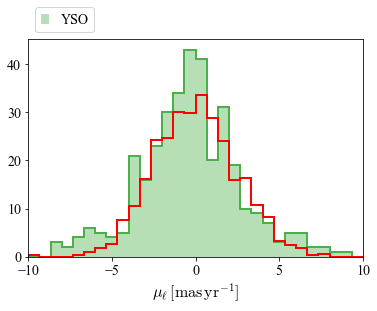

In [69]:
fltr = (yso['duplicate']==0)&(np.abs(yso['b'])<0.2)&(np.abs(wrap(yso['l']))<.3)&(np.abs(wrap(yso['l']))>0.0)&(yso['epml']<3.)
colors = ['#4daf4a','#984ea3','#ff7f00']
hist_(yso['pmb'][fltr],color=colors[0],range=[-10,10],bins=30,label='YSO');
plt.xlim(-10,10)
plt.legend(ncol=3,bbox_to_anchor=(0.,1.),loc='lower left',handlelength=0.6)
plt.xlabel(r'$\mu_\ell\,[\mathrm{mas\,yr}^{-1}]$')

fltrr = (np.abs(ss['b'])<0.2)&(wrap(ss['l'])<0.3)&(np.abs(ss['pmb'])<5.)
hist_(ss['pmb'][fltrr]+np.random.normal(0.,yso['epmb'][fltr].sample(np.count_nonzero(fltrr),replace=True),np.count_nonzero(fltrr)),
        bins=30,weights=6e-2*np.ones(np.count_nonzero(fltrr))*(18.2-(11.5-.3*ss['pmb'][fltrr])),
      fill=False,color='r',range=[-10,10]);

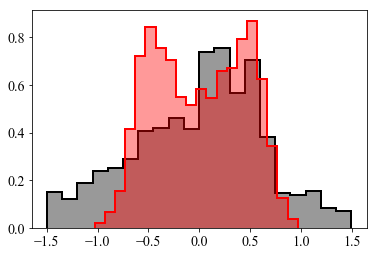

In [71]:
hist_(wrap(yso['l']),bins=20,normed=True);
hist_(wrap(ss['l']),bins=20,normed=True,color='r');

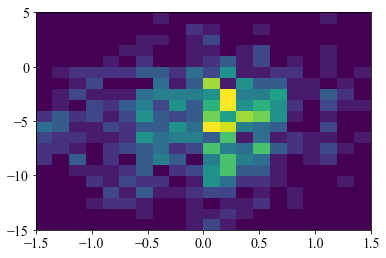

In [72]:
fltr = (yso['duplicate']==0)&(np.abs(yso['b'])<0.2)&(np.abs(yso['pmb'])<5.)&(yso['epml']<3.)
plt.hist2d(wrap(yso['l'][fltr]),yso['pml'][fltr],bins=20,range=[[-1.5,1.5],[-15,5]]);

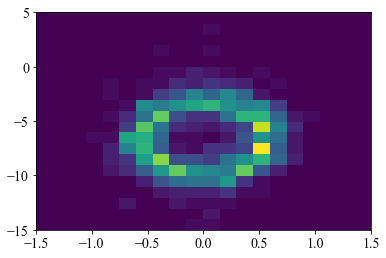

In [73]:
fltrr = (np.abs(ss['b'])<0.2)&(np.abs(ss['pmb'])<5.)
plt.hist2d(ss['l'][fltrr],ss['pml'][fltrr]+np.random.normal(0.,yso['epml'][fltr].sample(np.count_nonzero(fltrr),replace=True)),bins=20
          ,range=[[-1.5,1.5],[-15,5]]);

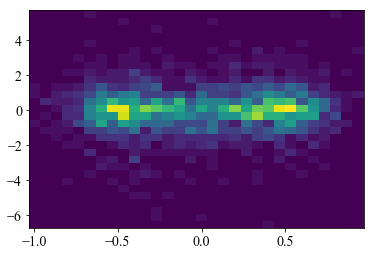

In [75]:
fltrr = (np.abs(ss['pmb'])<5.)
plt.hist2d(ss['l'][fltrr],ss['b'][fltrr]+np.random.normal(0.,yso['epml'][fltr].sample(np.count_nonzero(fltrr),replace=True)),bins=30);

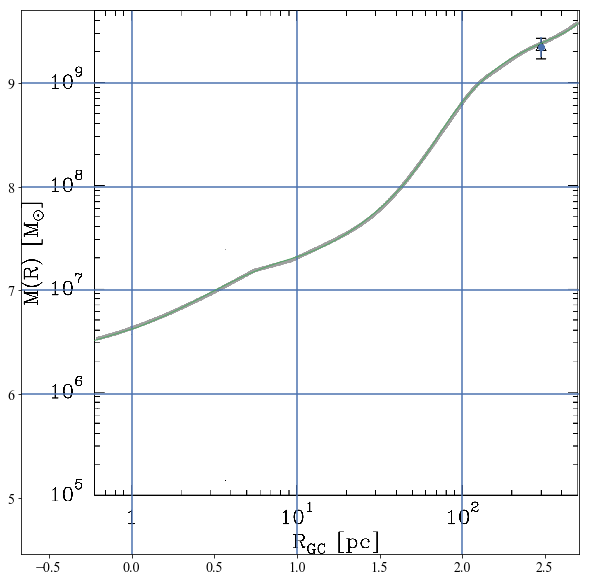

In [76]:
img=plt.imread('g7429.png')

plt.figure(figsize=[10.,10.])
plt.imshow(img,extent=[np.log10(0.215),np.log10(5.1e2),np.log10(2.9e4),np.log10(5e9)])
plt.gca().set_aspect('auto')
plt.errorbar(np.log10(burton_liszt['r']),np.log10(burton_liszt['m']),yerr=1./np.log(10.)*burton_liszt['em']/burton_liszt['m'],fmt='o')
plt.axvline(np.log10(1.))
plt.axvline(np.log10(100.))
# plt.axvline(np.log10(300.))
plt.axvline(np.log10(10.))
plt.axhline(np.log10(1e6))
plt.axhline(np.log10(1e7))
plt.axhline(np.log10(1e8))
plt.axhline(np.log10(1e9))
launhardt = launhardt_data()
xxx = np.linspace(0.6,500.,1000)
plt.plot(np.log10(xxx),np.log10(launhardt(xxx)),lw=1)